In [4]:
import os
import uuid
import shutil
#import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
#from pylatex.section import Chapter, Subsection
#from pylatex import Document, Section, Figure, NoEscape, Command

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [7]:
coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score1':'Int64','Flare1':'Int64',
          'Shelf1':'Int64','Evolution1':'Int64','Score2':'Int64','Flare2':'Int64','Shelf2':'Int64','Evolution2':'Int64'}

In [25]:
lclist=pd.read_csv('lcscoresandchecker.csv',dtype=coltypes)

In [31]:
def triple_lc(pop_id,sectors,period): #sectors must be a list of three sectors
    row1=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[0])]
    row1name=row1.lcname.values[0]
    lc1=get_lc_string(row1name)
    if row1.LC_author.values[0]=='FFI':
        lc1.flux=lc1.flux+1
    else:
        lc1=lc1.normalize()

    row2=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[1])]
    row2name=row2.lcname.values[0]
    lc2=get_lc_string(row2name)
    if row2.LC_author.values[0]=='FFI':
        lc2.flux=lc2.flux+1
    else:
        lc2=lc2.normalize()

    row3=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[2])]
    row3name=row3.lcname.values[0]
    lc3=get_lc_string(row3name)
    if row3.LC_author.values[0]=='FFI':
        lc3.flux=lc3.flux+1
    else:
        lc3=lc3.normalize()

    if period==1: #this tells you to use the first period vs the second in the data table
        period=u.Quantity(row1.per.values[0],u.d)
    else:
        period=u.Quantity(row1.per2.values[0],u.d)
    bintime=u.Quantity(period/200,u.s)
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
    subgraph_phaselc(lc1,period=period,ax=ax1,bintime=bintime,showperiod=False)
    subgraph_phaselc(lc2,period=period,ax=ax2,bintime=bintime,showperiod=False)
    subgraph_phaselc(lc3,period=period,ax=ax3,bintime=bintime,showperiod=False)
    
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax3.set_ylabel('')
    ax1.set_xlabel('')
    ax2.set_xlabel('')
    ax3.set_xlabel('')
    
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    ax3.set_xticklabels([])
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax1.tick_params(direction='in')
    ax2.tick_params(direction='in')
    ax3.tick_params(direction='in')
    plt.subplots_adjust(wspace=0)
    ax1.set_title(f'Sector {row1.secorcamp.values[0]}')
    ax2.set_title(f'Sector {row2.secorcamp.values[0]}')
    ax3.set_title(f'Sector {row3.secorcamp.values[0]}')
    #fig.suptitle(f'{pop_id}, TIC {k2row.TIC.values[0]}, {period}',y=0.94)
    fig.suptitle(f'TIC {row1.TIC.values[0]}, {period}')
    #fig.savefig(f'multiplots/comparison/{pop_id}.png',bbox_inches='tight')
    return fig

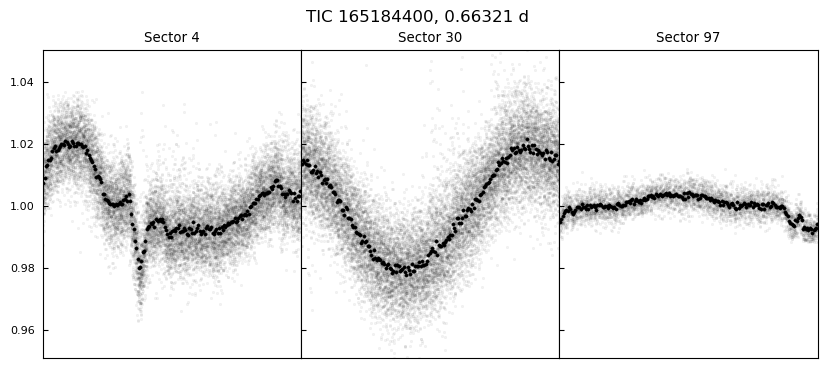

In [33]:
triple_lc(75,(4,30,97),1)

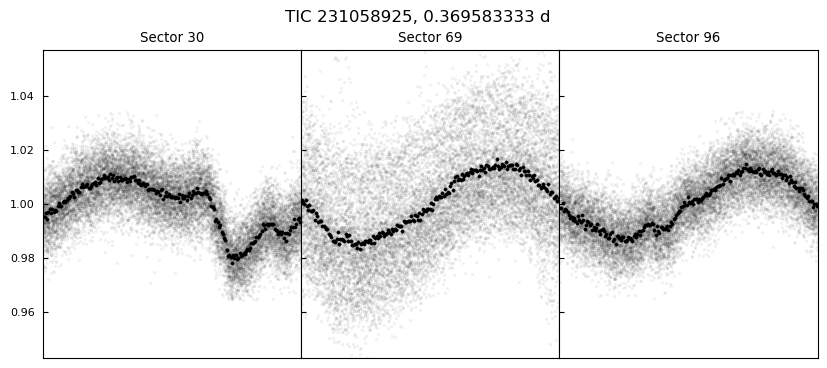

In [50]:
triple_lc(202,(30,69,96),1)

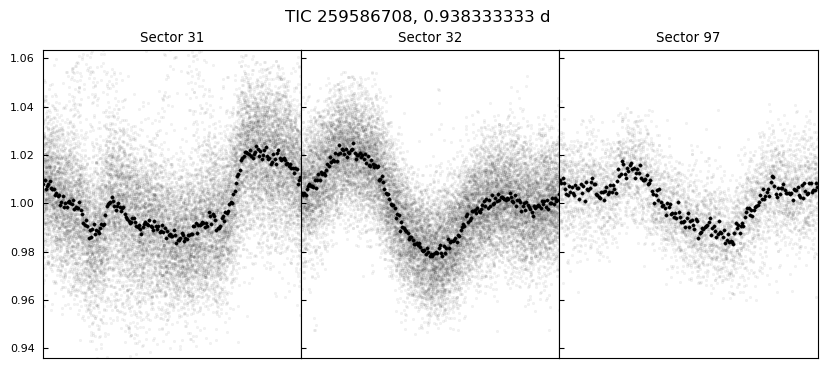

In [52]:
triple_lc(207,(31,32,97),1)

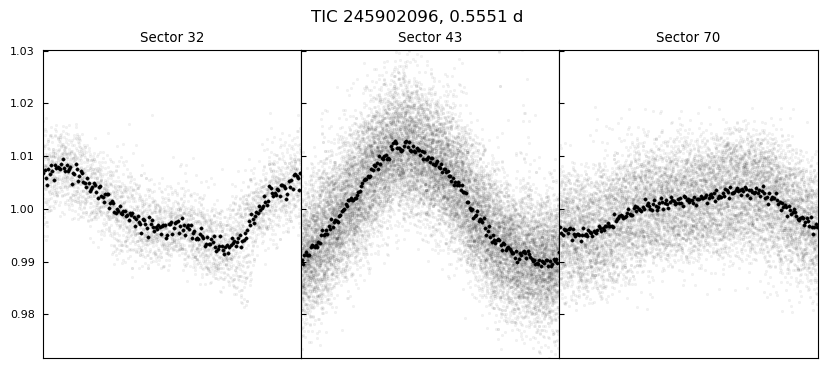

In [58]:
triple_lc(208,(32,43,70),2)

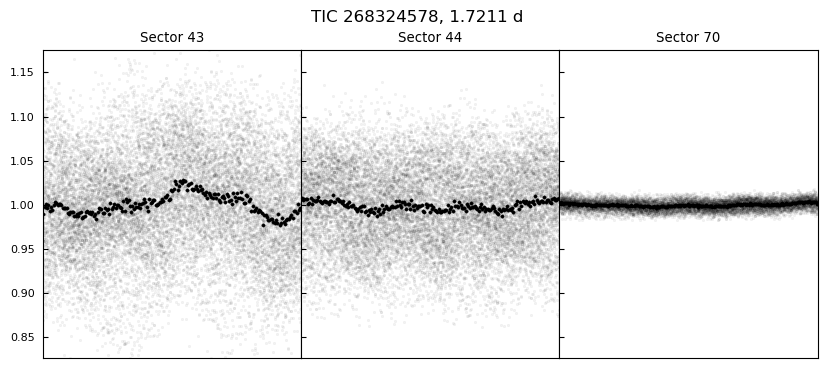

In [62]:
triple_lc(211,(43,44,70),1)

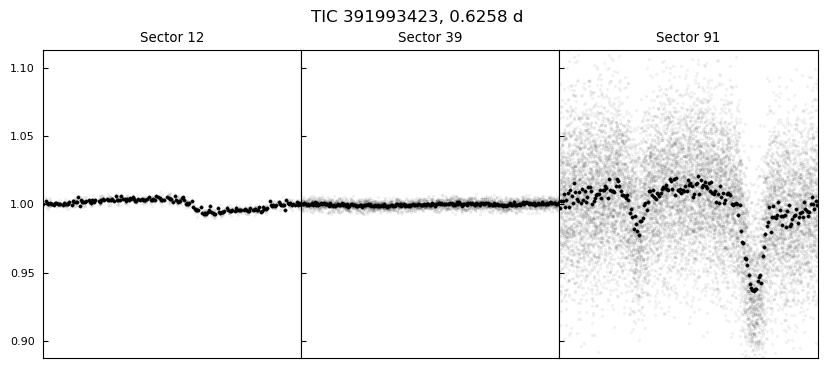

In [64]:
triple_lc(133,(12,39,91),1)

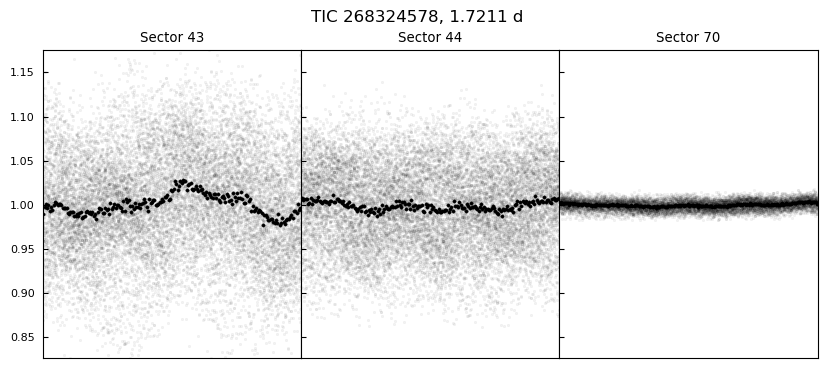

In [66]:
triple_lc(211,(43,44,70),1)